## Что такое звук?
Звук - это волна, которая распространяется в упругих средах (например, воздух, вода, различные твёрдые тела). В общем случае звук - это просто совокупность волн разных частот. И мы же с вами, люди, чаще всего сталкиваемся с колебанием давления воздуха которые наши уши и затем мозг воспринимают как “звук”.

Давайте разбираться со всем этим на конкретном примере.
В данном случае средой будет воздух вокруг меня. И в качестве источника звука (излучателя) мои голосовые связки сменит натянутая струна.


***Извлекает звук***

Мы сейчас, конечно, будем работать с цифровым сигналом, но давайте на его примере наглядно разберёмся с основными характеристиками звуковой волны в общем случае :)

In [1]:
import librosa

AUDIO_PATH = "audio/E2_string.mp3"

y, sr = librosa.load(AUDIO_PATH)

f"Sample Rate: {sr}"


'Sample Rate: 22050'

Декодируем наш звук с помощью библиотеки librosa, вызвав метод load, котрый возвращает нам:
- декодированный аудио сигнал (что есть векторы или же один вектор в случае с моно аудио);
- и частоту дискретизации (что это мы разберём чуть позже, когда будем говорить именно о цифровых сигналах)

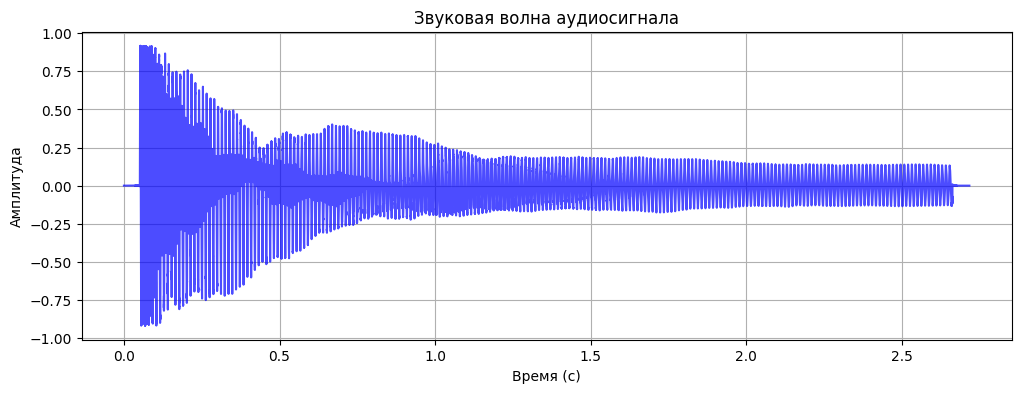

In [2]:
import IPython.display as ipd

from plot import plot_audio_signal


plot_audio_signal(y=y, sr=sr, title="Звуковая волна аудиосигнала")

ipd.Audio(y, rate=sr)

<!-- У аналогового звука, который наш мозг воспринимает с помощью барабанной перепонки и внутреннего уха (ДОПОЛНИТЬ/УБРАТЬ), есть следующие основные характеристики: -->
Как многие из вас помнят из школьного курса физики что у волны, в частности звуковой, есть следующие основные характеристики:

- Частота (frequency) - определяет высоту звука, измеряется в Герцах (Гц)
- Амплитуда (amplitude) - отвечает за громкость (чем выше амплитуда, тем громче звук)
- Фаза (Phase) - в какой момент “начинается” колебание (волна) относительно определённой точки времени

(Показать пример противофазы?)

## Частота (Frequency)
Для наглядности давайте значительно увеличим масштаб чтобы получше разглядеть как выглядит волна.

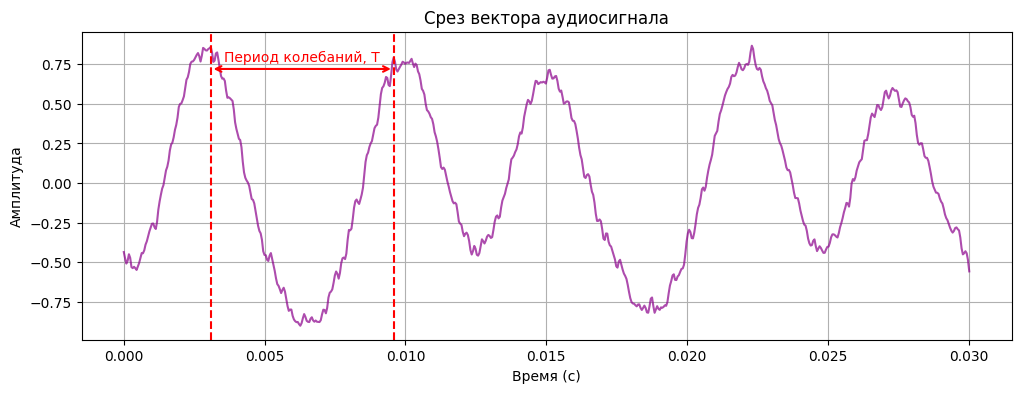

In [3]:
# Так как частота дискретизации определяет сколько значений будет содержаться в 1 секунде аудио,
# для более детального рассмотрения получим срез вектора, раный аудиосигналу от 0.11 до 0.14 секунды.

y_trimmed = y[int(sr*0.11):int(sr * 0.14)]

plot_audio_signal(y=y_trimmed, sr=sr, title="Срез вектора аудиосигнала", color="darkmagenta", show_signal_period=True)
ipd.Audio(y, rate=sr)

В реальной жизни звуковая волна — это не идеальная синусоида, которую можно было видеть в школьном учебнике физики, а совокупность множества частот (гармоник, обертонов и даже шума). Каждая музыкальная нота или человеческий голос имеет сложный «рисунок» волны

## f = $\frac{1}{T}$

Частота — это то, сколько раз волна повторяет свой цикл в единицу времени (секунду).
1 цикл (полное «вверх-вниз» колебание) = 𝑇

Чем короче 𝑇, тем выше частота (а значит, волна «колеблется» быстрее).

Нота E малой октавы - 82.11 Гц. Это значит что за одну секунду происходит ~82 полных циклов колебания.
Изобразим график сигнала от 1с до 2с. Если гитара настроена, на графике будет ~82 максимума

P.S. Как мы наша гитара настроена :)

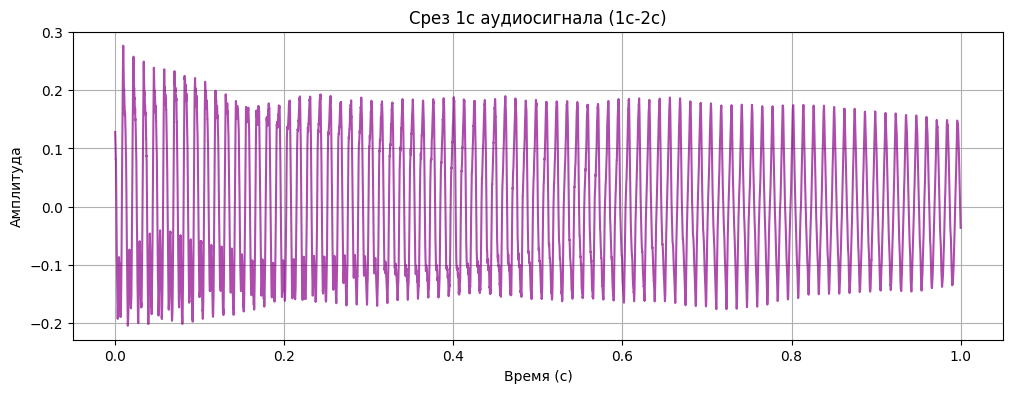

In [4]:
# значения с 1с до 2с аудио
y_trimmed_one_second = y[sr:int(sr * 2)]
plot_audio_signal(y=y_trimmed_one_second, sr=sr, title="Срез 1c аудиосигнала (1c-2c)", color="darkmagenta", show_signal_period=True)

### А теперь давайте увеличим частоту вдвое и посмотим (и послушаем) что получится!

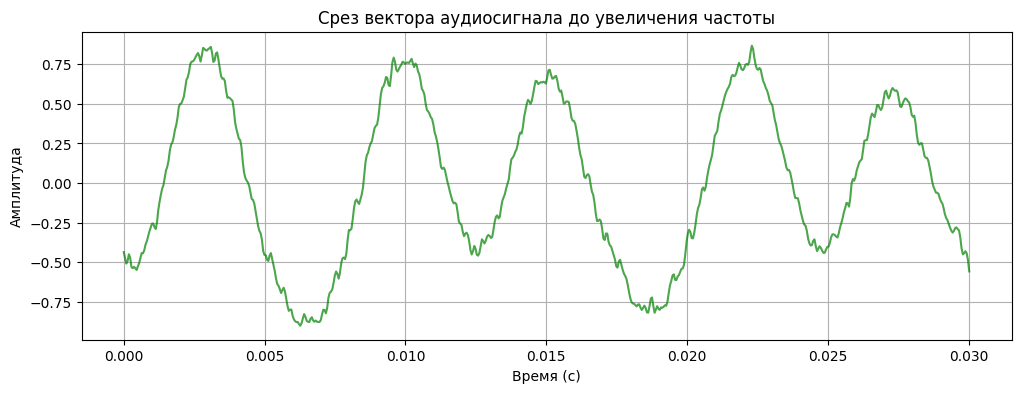

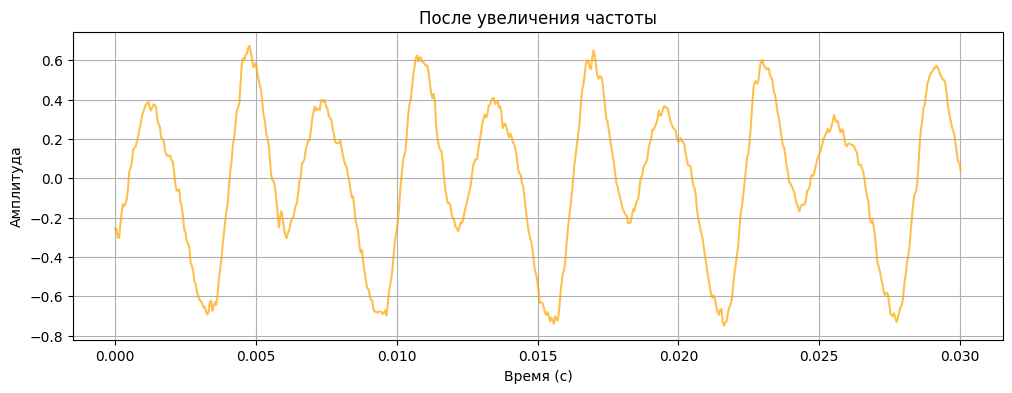

In [5]:
y_pitched = y[::2]
y_pitched_trimmed = y_pitched[int(sr*0.11):int(sr * 0.14)]

plot_audio_signal(y=y_trimmed, sr=sr, color="green", title="Срез вектора аудиосигнала до увеличения частоты")
ipd.display(ipd.Audio(y, rate=sr))

plot_audio_signal(y=y_pitched_trimmed, sr=sr, color="orange", title="После увеличения частоты")
ipd.display(ipd.Audio(y_pitched, rate=sr))

Как мы можем слышать, при увеличении частоты вдвое звук стал выше на октаву

### Амплитуда (Amplitude)

Амплитуда — это максимальное «отклонение» волны от среднего уровня (здесь 0). Чем больше амплитуда, тем «громче» (мощнее) колебания. На графике она соответствует вершинам (пику +1) и впадинам (пику -1) синусоиды. Попробуем уменьшить амплитуду сигнала, уменьшив все значения вектора в 2 раза

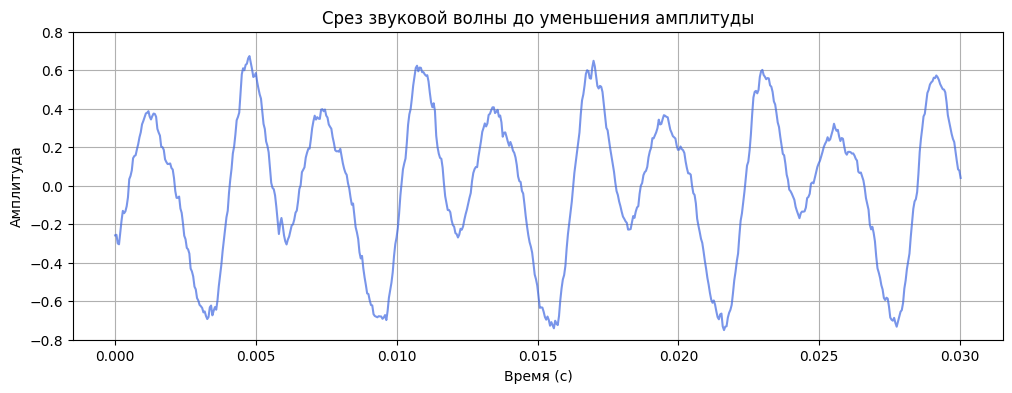

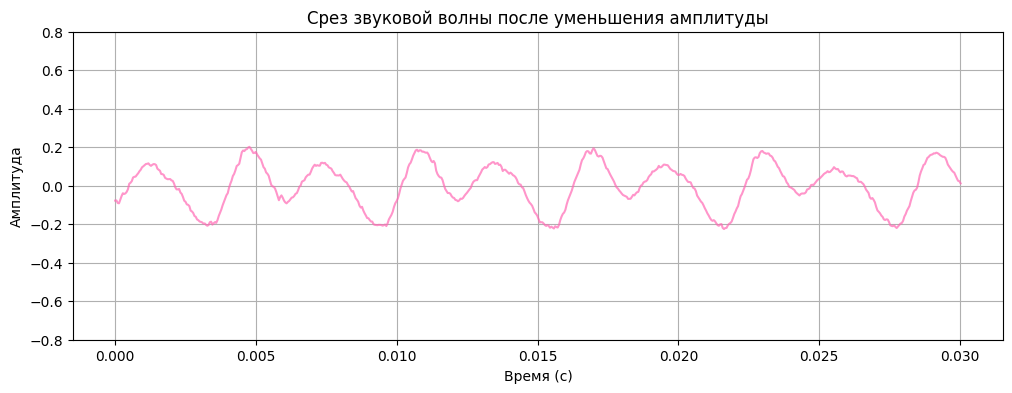

In [6]:
y_pitched_quieter = y_pitched * 0.3
y_pitched_quieter_trimmed = y_pitched_quieter[int(sr*0.11):int(sr * 0.14)]

plot_audio_signal(y=y_pitched_trimmed, sr=sr, title="Срез звуковой волны до уменьшения амплитуды", max_y=0.8, color="royalblue")
# Флаг normalize важен, так как без него библиотека нормализует значения вектора, сделав звук громче
ipd.display(ipd.Audio(y_pitched, rate=sr, normalize=False))

plot_audio_signal(y=y_pitched_quieter_trimmed, sr=sr, title="Срез звуковой волны после уменьшения амплитуды", color="hotpink", max_y=0.8)
ipd.display(ipd.Audio(y_pitched_quieter, rate=sr, normalize=False))

### Фаза и фазовый сдвиг

Фаза – это сдвиг сигнала во времени. Если два звуковых сигнала имеют одинаковую форму, но один из них немного сдвинут по времени, говорят, что они находятся в разной фазе.

Противофаза – это особый случай, когда сигнал инвертируется: каждый положительный пик превращается в отрицательный и наоборот. Если два одинаковых сигнала находятся в противофазе (разница фаз 180°), их сложение приведёт к полной компенсации – звук исчезнет.

Пример из реальной жизни: фазовый сдвиг может появиться при записи одного источника звука с помощью двух микрофонов.

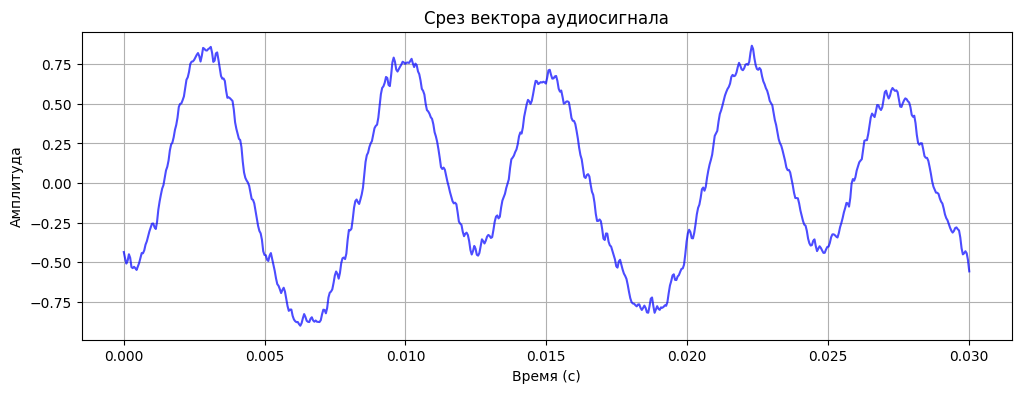

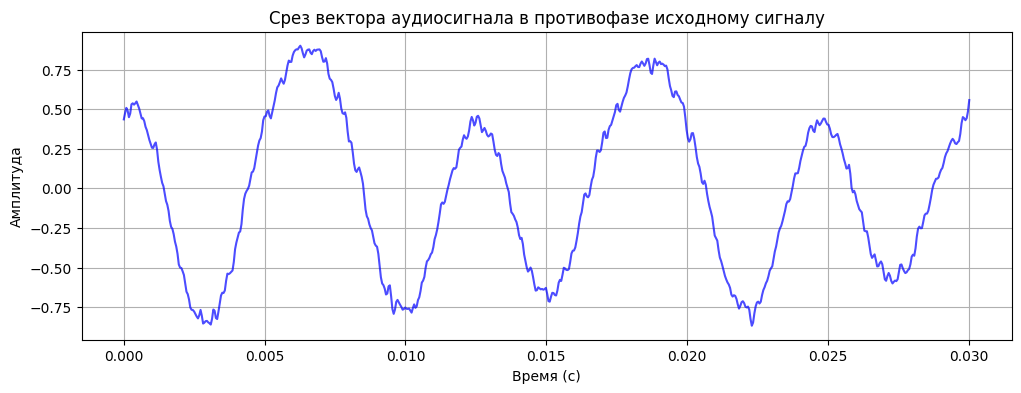

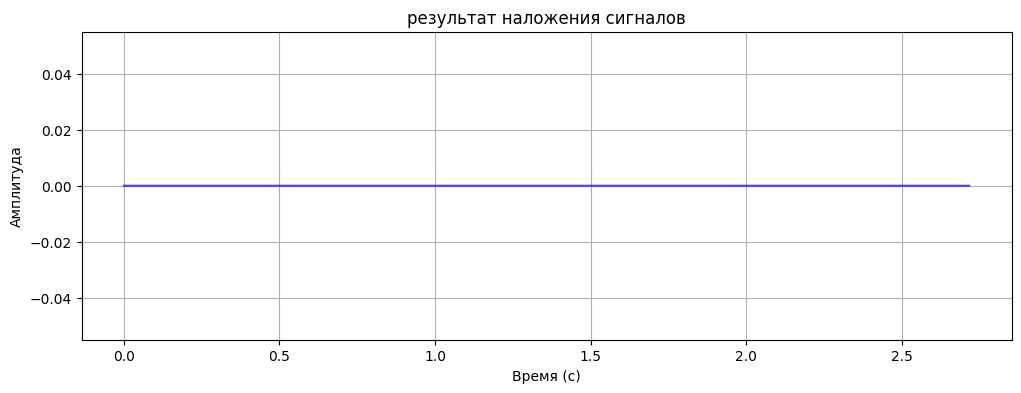

/home/gio/code/audio_course/.venv/lib/python3.12/site-packages/IPython/lib/display.py:187: RuntimeWarning: invalid value encountered in divide
  scaled = data / normalization_factor * 32767
/home/gio/code/audio_course/.venv/lib/python3.12/site-packages/IPython/lib/display.py:188: RuntimeWarning: invalid value encountered in cast
  return scaled.astype("<h").tobytes(), nchan


In [7]:
y_shifted = y * -1

y_trimmed = y[int(sr*0.11):int(sr * 0.14)]
y_shifted_trimmed = y_shifted[int(sr*0.11):int(sr * 0.14)]
y_phase_shift = y_shifted + y

plot_audio_signal(y=y_trimmed, sr=sr, title="Срез вектора аудиосигнала")
plot_audio_signal(y=y_shifted_trimmed, sr=sr, title="Срез вектора аудиосигнала в противофазе исходному сигналу")
plot_audio_signal(y=y_phase_shift, sr=sr, title="результат наложения сигналов")

ipd.Audio(y_phase_shift, rate=sr)
